Saving player_data.json to player_data (1).json
🔍 أول 5 صفوف:
  playerId  moves  timeTaken  success               sessionTime
0     رزان     17         33        1  2025-05-21T17:30:01.008Z
1     محمد     16         25        1  2025-05-21T17:30:58.056Z
2     محمد     22         37        1  2025-05-21T17:32:13.928Z
3   ياسمين     22         37        1  2025-05-21T17:36:49.704Z
4    تسنيم     20         36        1  2025-05-21T17:57:04.168Z

📊 ملخص البيانات:
           moves   timeTaken  success
count  19.000000   19.000000     19.0
mean   23.578947   38.526316      1.0
std    12.672436   20.128389      0.0
min    16.000000   24.000000      1.0
25%    16.500000   26.500000      1.0
50%    18.000000   32.000000      1.0
75%    22.000000   37.000000      1.0
max    64.000000  104.000000      1.0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


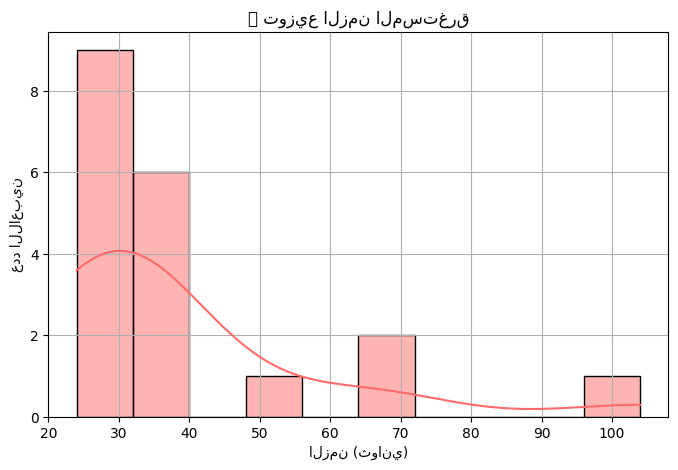

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


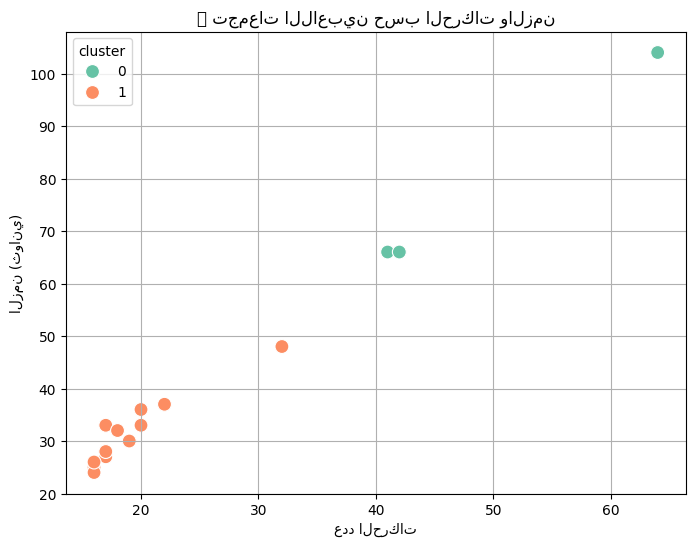

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


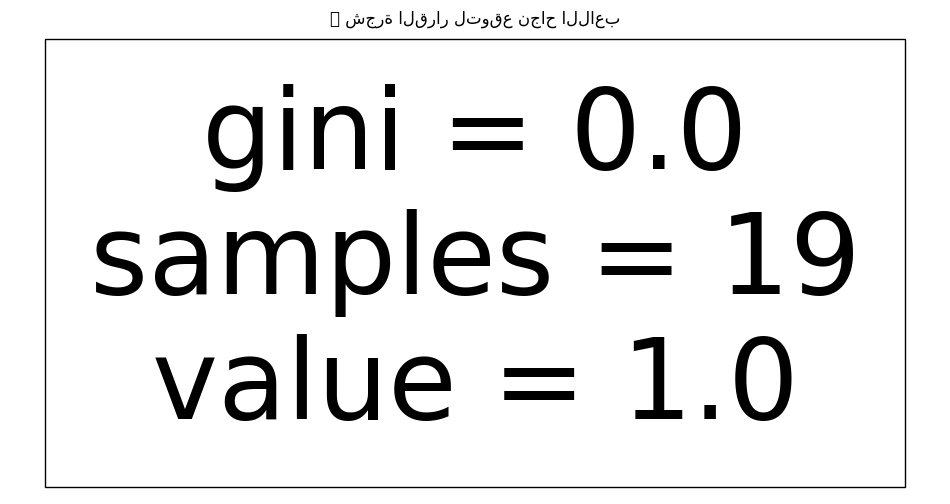

In [2]:
# 📊 تحليل بيانات اللاعبين من JSON باستخدام أدوات الذكاء الاصطناعي

# 1️⃣ تحميل ملف JSON من جهازك
from google.colab import files
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, plot_tree

uploaded = files.upload()

# 2️⃣ قراءة ملف JSON وتحويله إلى DataFrame
with open("player_data.json", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# 3️⃣ عرض أول الصفوف من البيانات
print("🔍 أول 5 صفوف:")
print(df.head())

# 4️⃣ نظرة إحصائية عامة
print("\n📊 ملخص البيانات:")
print(df.describe())

# 5️⃣ رسم بياني - توزيع الزمن المستغرق
plt.figure(figsize=(8, 5))
sns.histplot(df["timeTaken"], bins=10, kde=True, color="#ff6b6b")
plt.title("⏱️ توزيع الزمن المستغرق")
plt.xlabel("الزمن (ثواني)")
plt.ylabel("عدد اللاعبين")
plt.grid(True)
plt.show()

# 6️⃣ تحليل التجمعات (Clustering) باستخدام KMeans
X = df[["moves", "timeTaken"]]
kmeans = KMeans(n_clusters=2, random_state=0)
df["cluster"] = kmeans.fit_predict(X)

# عرض التجمعات بشكل مرئي
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="moves", y="timeTaken", hue="cluster", palette="Set2", s=100)
plt.title("🎯 تجمعات اللاعبين حسب الحركات والزمن")
plt.xlabel("عدد الحركات")
plt.ylabel("الزمن (ثواني)")
plt.grid(True)
plt.show()

# 7️⃣ تدريب نموذج شجرة القرار Decision Tree لتوقع النجاح
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X, df["success"])

# 8️⃣ رسم شجرة القرار
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=["moves", "timeTaken"], class_names=["فشل", "نجاح"], filled=True)
plt.title("🌳 شجرة القرار لتوقع نجاح اللاعب")
plt.show()
